<a href="https://colab.research.google.com/github/kszymon/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja kolumn](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)



### <a name='a1'></a>  Import Bibliotek

In [3]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.2.2


In [11]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań na spółek na giełdzie według symboli na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-10-18 to 2019-10-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [12]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-18,187.1500,190.7400,186.2800,188.9900,37417670
2024-10-17,188.2200,188.9400,186.0000,187.5300,25039414
2024-10-16,187.0500,187.7800,185.6100,186.8900,23456812
2024-10-15,187.6300,188.4100,184.5800,187.6900,32178925
2024-10-14,189.7800,189.8300,187.3600,187.5400,22614407
...,...,...,...,...,...
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040
2019-10-24,88.5545,89.4170,88.0135,89.0390,104087000
2019-10-23,88.0650,88.5025,87.1000,88.1085,43807600


In [13]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-18,187.15,190.74,186.28,188.99,37417670
2024-10-17,188.22,188.94,186.00,187.53,25039414
2024-10-16,187.05,187.78,185.61,186.89,23456812
2024-10-15,187.63,188.41,184.58,187.69,32178925
2024-10-14,189.78,189.83,187.36,187.54,22614407


### <a name='a2'></a>  Załadowanie danych

In [17]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-18,187.15,190.74,186.28,188.99,37417670
2024-10-17,188.22,188.94,186.00,187.53,25039414
2024-10-16,187.05,187.78,185.61,186.89,23456812


In [18]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040
2019-10-24,88.5545,89.4170,88.0135,89.0390,104087000
2019-10-23,88.0650,88.5025,87.1000,88.1085,43807600
2019-10-22,89.4075,89.4890,88.1000,88.2865,44688500
2019-10-21,88.4830,89.2940,88.2500,89.2830,44498040


In [19]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,89.4005,89.8725,89.2605,89.5720,55807080
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040
2019-10-24,88.5545,89.4170,88.0135,89.0390,104087000
2019-10-23,88.0650,88.5025,87.1000,88.1085,43807600
2019-10-22,89.4075,89.4890,88.1000,88.2865,44688500


In [20]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [22]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-10-18,187.15,190.74,186.28,188.99,37417670
2024-10-17,188.22,188.94,186.00,187.53,25039414
2024-10-16,187.05,187.78,185.61,186.89,23456812
2024-10-15,187.63,188.41,184.58,187.69,32178925
2024-10-14,189.78,189.83,187.36,187.54,22614407


In [24]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,141.940788,143.669917,140.095968,141.908417,6.936780e+07
std,31.198702,31.293356,30.962085,31.104043,3.381854e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,115.025000,117.265000,113.495000,115.279500,4.763759e+07
50%,150.555000,152.944500,148.045000,150.211000,6.078330e+07
75%,167.383250,168.747750,165.198750,167.079750,8.223073e+07
max,200.090000,201.200000,199.045000,200.000000,3.113457e+08


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.419408e+02,3.119870e+01,8.207550e+01,1.150250e+02,1.505550e+02,1.673833e+02,2.000900e+02
high,1258.0,1.436699e+02,3.129336e+01,8.348000e+01,1.172650e+02,1.529445e+02,1.687477e+02,2.012000e+02
low,1258.0,1.400960e+02,3.096209e+01,8.130160e+01,1.134950e+02,1.480450e+02,1.651987e+02,1.990450e+02
close,1258.0,1.419084e+02,3.110404e+01,8.182000e+01,1.152795e+02,1.502110e+02,1.670798e+02,2.000000e+02
volume,1258.0,6.936780e+07,3.381854e+07,1.762674e+07,4.763759e+07,6.078330e+07,8.223073e+07,3.113457e+08


### <a name='a3'></a>  Eksploracja danych

### <a name='a4'></a> Selekcja kolumn

In [27]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-10-18,187.150,190.7400,186.28,188.99,37417670
2024-10-17,188.220,188.9400,186.00,187.53,25039414
2024-10-16,187.050,187.7800,185.61,186.89,23456812
2024-10-15,187.630,188.4100,184.58,187.69,32178925
2024-10-14,189.780,189.8300,187.36,187.54,22614407
2024-10-11,186.630,189.9284,186.30,188.82,25751557
2024-10-10,187.130,188.1340,185.83,186.65,27785043
2024-10-09,182.820,185.8450,182.05,185.17,26343117
2024-10-08,181.915,183.0900,180.92,182.72,26372086


In [28]:
df['open']

,open
Date,
2024-10-18,187.150
2024-10-17,188.220
2024-10-16,187.050
2024-10-15,187.630
2024-10-14,189.780
2024-10-11,186.630
2024-10-10,187.130
2024-10-09,182.820
2024-10-08,181.915


In [29]:
df.open

,open
Date,
2024-10-18,187.150
2024-10-17,188.220
2024-10-16,187.050
2024-10-15,187.630
2024-10-14,189.780
2024-10-11,186.630
2024-10-10,187.130
2024-10-09,182.820
2024-10-08,181.915


In [30]:
df[['open']]

,open
Date,
2024-10-18,187.150
2024-10-17,188.220
2024-10-16,187.050
2024-10-15,187.630
2024-10-14,189.780
2024-10-11,186.630
2024-10-10,187.130
2024-10-09,182.820
2024-10-08,181.915


In [31]:
df[['open','close']]

,open,close
Date,,
2024-10-18,187.150,188.99
2024-10-17,188.220,187.53
2024-10-16,187.050,186.89
2024-10-15,187.630,187.69
2024-10-14,189.780,187.54
2024-10-11,186.630,188.82
2024-10-10,187.130,186.65
2024-10-09,182.820,185.17
2024-10-08,181.915,182.72


In [32]:
df.iloc[:,0]

,open
Date,
2024-10-18,187.150
2024-10-17,188.220
2024-10-16,187.050
2024-10-15,187.630
2024-10-14,189.780
2024-10-11,186.630
2024-10-10,187.130
2024-10-09,182.820
2024-10-08,181.915


In [33]:
df.iloc[:, [0,3]]

,open,close
Date,,
2024-10-18,187.150,188.99
2024-10-17,188.220,187.53
2024-10-16,187.050,186.89
2024-10-15,187.630,187.69
2024-10-14,189.780,187.54
2024-10-11,186.630,188.82
2024-10-10,187.130,186.65
2024-10-09,182.820,185.17
2024-10-08,181.915,182.72


In [39]:
df.iloc[:, 3:5]

,close,volume
Date,,
2024-10-18,188.99,37417670
2024-10-17,187.53,25039414
2024-10-16,186.89,23456812
2024-10-15,187.69,32178925
2024-10-14,187.54,22614407
2024-10-11,188.82,25751557
2024-10-10,186.65,27785043
2024-10-09,185.17,26343117
2024-10-08,182.72,26372086


In [41]:
df.iloc[:,-1]

,volume
Date,
2024-10-18,37417670
2024-10-17,25039414
2024-10-16,23456812
2024-10-15,32178925
2024-10-14,22614407
2024-10-11,25751557
2024-10-10,27785043
2024-10-09,26343117
2024-10-08,26372086


In [42]:
df.iloc[:,[-1]]

,volume
Date,
2024-10-18,37417670
2024-10-17,25039414
2024-10-16,23456812
2024-10-15,32178925
2024-10-14,22614407
2024-10-11,25751557
2024-10-10,27785043
2024-10-09,26343117
2024-10-08,26372086


In [43]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-10-18,186.28,188.99,37417670
2024-10-17,186.00,187.53,25039414
2024-10-16,185.61,186.89,23456812
2024-10-15,184.58,187.69,32178925
2024-10-14,187.36,187.54,22614407
2024-10-11,186.30,188.82,25751557
2024-10-10,185.83,186.65,27785043
2024-10-09,182.05,185.17,26343117
2024-10-08,180.92,182.72,26372086


### <a name='a5'></a> Selekcja wierszy

In [44]:
df

,open,high,low,close,volume
Date,,,,,
2024-10-18,187.150,190.7400,186.28,188.99,37417670
2024-10-17,188.220,188.9400,186.00,187.53,25039414
2024-10-16,187.050,187.7800,185.61,186.89,23456812
2024-10-15,187.630,188.4100,184.58,187.69,32178925
2024-10-14,189.780,189.8300,187.36,187.54,22614407
2024-10-11,186.630,189.9284,186.30,188.82,25751557
2024-10-10,187.130,188.1340,185.83,186.65,27785043
2024-10-09,182.820,185.8450,182.05,185.17,26343117
2024-10-08,181.915,183.0900,180.92,182.72,26372086


In [45]:
df.iloc[0]

,2024-10-18
open,187.15
high,190.74
low,186.28
close,188.99
volume,37417670.00


In [46]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-10-18,187.15,190.74,186.28,188.99,37417670
2024-10-17,188.22,188.94,186.00,187.53,25039414
2024-10-16,187.05,187.78,185.61,186.89,23456812


In [51]:
df

,open,high,low,close,volume
Date,,,,,
2024-10-18,187.150,190.7400,186.28,188.99,37417670
2024-10-17,188.220,188.9400,186.00,187.53,25039414
2024-10-16,187.050,187.7800,185.61,186.89,23456812
2024-10-15,187.630,188.4100,184.58,187.69,32178925
2024-10-14,189.780,189.8300,187.36,187.54,22614407
2024-10-11,186.630,189.9284,186.30,188.82,25751557
2024-10-10,187.130,188.1340,185.83,186.65,27785043
2024-10-09,182.820,185.8450,182.05,185.17,26343117
2024-10-08,181.915,183.0900,180.92,182.72,26372086


In [50]:
df.loc['2024-10-18']

,2024-10-18
open,187.15
high,190.74
low,186.28
close,188.99
volume,37417670.00


In [74]:
df.loc['2024-10-15' : ]

,open,high,low,close,volume
Date,,,,,
2024-10-18,187.15,190.74,186.28,188.99,37417670
2024-10-17,188.22,188.94,186.00,187.53,25039414
2024-10-16,187.05,187.78,185.61,186.89,23456812
2024-10-15,187.63,188.41,184.58,187.69,32178925


### <a name='a6'></a> Obliczanie nowych kolumn

In [76]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-10-18 to 2019-10-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [77]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,43.625861,44.432761,42.792730,43.624682,2.522597e+07
std,15.428652,15.525557,15.271476,15.384903,1.745898e+07
min,15.960000,17.800000,13.710000,14.820000,5.200356e+06
25%,31.360000,32.036250,30.715800,31.410000,1.609488e+07
50%,40.075000,40.860000,39.249950,40.080000,2.112088e+07
75%,53.277500,54.250000,51.867500,53.055000,2.908972e+07
max,85.640000,87.000000,84.180000,86.340000,3.642612e+08


In [78]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-18,80.53,80.55,78.80,79.16,14186721
2024-10-17,79.92,80.88,79.41,79.90,27373196
2024-10-16,82.93,83.48,81.62,81.90,12398522


In [80]:
df['Average'] = (df.Open + df.Close) / 2.0
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-10-18,80.53,80.5500,78.800,79.16,14186721,79.845
2024-10-17,79.92,80.8800,79.410,79.90,27373196,79.910
2024-10-16,82.93,83.4800,81.620,81.90,12398522,82.415
2024-10-15,84.77,84.7700,82.650,83.20,14858455,83.985
2024-10-14,85.64,86.1800,84.180,84.94,14752430,85.290
...,...,...,...,...,...,...
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960


In [87]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-10-21,31.95,32.2828,31.185,31.41,7232322,31.680
2019-10-22,31.41,33.8900,30.220,32.53,19244283,31.970
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955


In [92]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-10-21,31.95,32.2828,31.185,31.41,7232322,31.680,NaN
2019-10-22,31.41,33.8900,30.220,32.53,19244283,31.970,31.41
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960,32.53
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140,33.05
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955,33.28


In [95]:
df['Daily_Change'] = df.Close / df.Close_shift -1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-10-21,31.95,32.2828,31.185,31.41,7232322,31.680,NaN,NaN,NaN
2019-10-22,31.41,33.8900,30.220,32.53,19244283,31.970,31.41,0.035657,0.035657
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960,32.53,0.015985,0.015985
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140,33.05,0.006959,0.006959
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955,33.28,-0.017127,-0.017127


In [96]:
del df['Daily Change']

In [97]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-10-21,31.95,32.2828,31.185,31.41,7232322,31.680,NaN,NaN
2019-10-22,31.41,33.8900,30.220,32.53,19244283,31.970,31.41,0.035657
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960,32.53,0.015985
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140,33.05,0.006959
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955,33.28,-0.017127


In [98]:
df.Daily_Change.min()

-0.21628767847699626

In [99]:
df.Daily_Change.max()

0.3825910931174088

<Axes: >

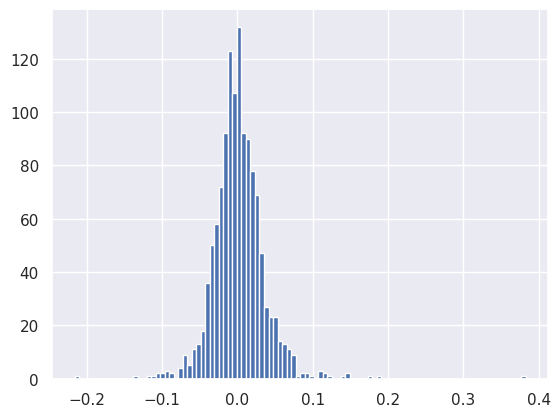

In [102]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

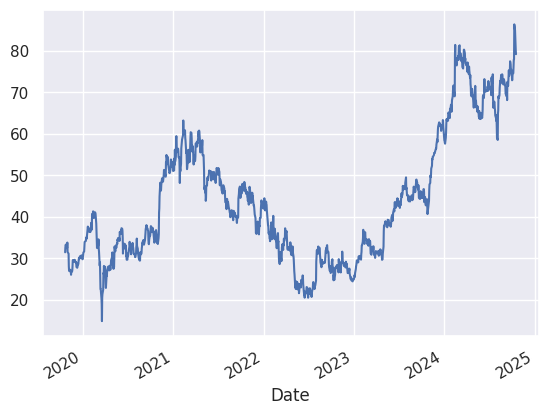

In [103]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [104]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-10-21,31.95,32.2828,31.185,31.41,7232322,31.680,NaN,NaN
2019-10-22,31.41,33.8900,30.220,32.53,19244283,31.970,31.41,0.035657
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960,32.53,0.015985
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140,33.05,0.006959
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955,33.28,-0.017127
...,...,...,...,...,...,...,...,...
2024-10-14,85.64,86.1800,84.180,84.94,14752430,85.290,86.34,-0.016215
2024-10-15,84.77,84.7700,82.650,83.20,14858455,83.985,84.94,-0.020485
2024-10-16,82.93,83.4800,81.620,81.90,12398522,82.415,83.20,-0.015625


In [108]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-10-22,31.410,33.890,30.220,32.53,19244283,31.9700,31.41,0.035657
2019-10-23,32.870,33.270,32.170,33.05,6843199,32.9600,32.53,0.015985
2019-10-24,33.000,33.420,32.510,33.28,6789619,33.1400,33.05,0.006959
2019-10-28,32.880,33.355,32.500,33.22,8073107,33.0500,32.71,0.015592
2019-10-30,32.510,33.800,32.110,33.75,10861056,33.1300,32.42,0.041024
...,...,...,...,...,...,...,...,...
2024-10-07,74.255,75.740,73.730,74.59,15328806,74.4225,74.28,0.004173
2024-10-08,75.250,77.020,75.060,76.17,17800250,75.7100,74.59,0.021182
2024-10-09,76.000,77.960,75.955,77.87,17251051,76.9350,76.17,0.022318


In [109]:
df_positive.Daily_Change.mean()

0.025303529376102373

In [110]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-10-25,33.20,33.48,32.6100,32.71,8106804,32.955,33.28,-0.017127
2019-10-29,32.37,32.92,31.8146,32.42,9357355,32.395,33.22,-0.024082
2019-10-31,33.23,33.36,31.2600,31.50,16130023,32.365,33.75,-0.066667
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
...,...,...,...,...,...,...,...,...
2024-10-14,85.64,86.18,84.1800,84.94,14752430,85.290,86.34,-0.016215
2024-10-15,84.77,84.77,82.6500,83.20,14858455,83.985,84.94,-0.020485
2024-10-16,82.93,83.48,81.6200,81.90,12398522,82.415,83.20,-0.015625


In [111]:
df_negative.Daily_Change.mean()

-0.02236372904569153

In [112]:
df.Close == df.High

,0
Date,
2019-10-21,False
2019-10-22,False
2019-10-23,False
2019-10-24,False
2019-10-25,False
...,...
2024-10-14,False
2024-10-15,False
2024-10-16,False


In [113]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [114]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [115]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-10-21,31.95,32.2828,31.185,31.41,7232322,31.680,NaN,NaN
2019-10-22,31.41,33.8900,30.220,32.53,19244283,31.970,31.41,0.035657
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960,32.53,0.015985
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140,33.05,0.006959
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955,33.28,-0.017127
...,...,...,...,...,...,...,...,...
2024-10-14,85.64,86.1800,84.180,84.94,14752430,85.290,86.34,-0.016215
2024-10-15,84.77,84.7700,82.650,83.20,14858455,83.985,84.94,-0.020485
2024-10-16,82.93,83.4800,81.620,81.90,12398522,82.415,83.20,-0.015625


In [117]:
df.index > '2024-10-01'

array([False, False, False, ...,  True,  True,  True])

In [118]:
df[df.index > '2024-10-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-10-02,74.090,74.31,72.790,72.87,11323367,73.4800,74.24,-0.018454
2024-10-03,72.560,73.21,71.900,72.94,11096334,72.7500,72.87,0.000961
2024-10-04,74.110,74.32,73.220,74.28,10757712,74.1950,72.94,0.018371
2024-10-07,74.255,75.74,73.730,74.59,15328806,74.4225,74.28,0.004173
2024-10-08,75.250,77.02,75.060,76.17,17800250,75.7100,74.59,0.021182
2024-10-09,76.000,77.96,75.955,77.87,17251051,76.9350,76.17,0.022318
2024-10-10,77.650,78.24,76.900,77.92,15033626,77.7850,77.87,0.000642
2024-10-11,82.000,87.00,81.860,86.34,57290484,84.1700,77.92,0.108060
2024-10-14,85.640,86.18,84.180,84.94,14752430,85.2900,86.34,-0.016215


In [121]:
df[(df.index >= '2024-10-01') & (df.index < '2024-10-10')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-10-01,75.770,75.77,73.840,74.24,8980535,75.0050,75.16,-0.012241
2024-10-02,74.090,74.31,72.790,72.87,11323367,73.4800,74.24,-0.018454
2024-10-03,72.560,73.21,71.900,72.94,11096334,72.7500,72.87,0.000961
2024-10-04,74.110,74.32,73.220,74.28,10757712,74.1950,72.94,0.018371
2024-10-07,74.255,75.74,73.730,74.59,15328806,74.4225,74.28,0.004173
2024-10-08,75.250,77.02,75.060,76.17,17800250,75.7100,74.59,0.021182
2024-10-09,76.000,77.96,75.955,77.87,17251051,76.9350,76.17,0.022318


In [123]:
df[(df.index == '2024-10-01') | (df.index == '2024-10-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-10-01,75.770,75.77,73.84,74.24,8980535,75.0050,75.16,-0.012241
2024-10-07,74.255,75.74,73.73,74.59,15328806,74.4225,74.28,0.004173


In [124]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-10-21,31.95,32.2828,31.185,31.41,7232322,31.680,NaN,NaN
2019-10-22,31.41,33.8900,30.220,32.53,19244283,31.970,31.41,0.035657
2019-10-23,32.87,33.2700,32.170,33.05,6843199,32.960,32.53,0.015985
2019-10-24,33.00,33.4200,32.510,33.28,6789619,33.140,33.05,0.006959
2019-10-25,33.20,33.4800,32.610,32.71,8106804,32.955,33.28,-0.017127
...,...,...,...,...,...,...,...,...
2024-10-14,85.64,86.1800,84.180,84.94,14752430,85.290,86.34,-0.016215
2024-10-15,84.77,84.7700,82.650,83.20,14858455,83.985,84.94,-0.020485
2024-10-16,82.93,83.4800,81.620,81.90,12398522,82.415,83.20,-0.015625


In [126]:
df.index.month == 5

array([False, False, False, ..., False, False, False])

In [127]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-05-01,29.13,29.7200,28.325,28.39,19290192,28.760,30.27,-0.062108
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,28.07,-0.008906
2020-05-07,29.60,31.6500,29.580,30.93,62229496,30.265,27.82,0.111790
...,...,...,...,...,...,...,...,...
2024-05-24,63.78,64.7600,63.620,64.26,10385892,64.020,63.60,0.010377
2024-05-28,64.61,64.6100,63.100,63.52,14213346,64.065,64.26,-0.011516
2024-05-29,63.01,65.3650,62.910,64.93,16987906,63.970,63.52,0.022198


In [130]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
2020-10-01,36.860,37.8282,36.5800,37.14,19187502,37.0000,36.48,0.018092
2020-12-01,50.000,51.4100,49.0700,49.63,20619101,49.8150,49.66,-0.000604
2021-02-01,52.120,52.9000,51.3500,52.76,15570904,52.4400,50.93,0.035932
